In [40]:
import tensorflow as tf
from tensorflow.keras.models import load_model

from PIL import Image as PILImage

import cv2
import numpy as np
import glob
import os

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import Sequence

from keras.layers import Layer

import csv

In [22]:
IMAGE_SIZE = (256, 256)

In [23]:
def imshow(a, size=1.0):
    # Clip and convert the image to uint8
    a = a.clip(0, 255).astype("uint8")
    
    # Resize the image if a size factor is provided
    if size != 1.0:
        new_dim = (int(a.shape[1] * size), int(a.shape[0] * size))
        a = cv2.resize(a, new_dim, interpolation=cv2.INTER_AREA)
    
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    
    # Display the image
    display(PILImage.fromarray(a))

In [24]:
data_folder = "Data/00*"
image_files = glob.glob(os.path.join(data_folder, "*.jpg"), recursive=True)

In [27]:
class L2Normalization(Layer):
    def call(self, inputs):
        return tf.math.l2_normalize(inputs, axis=1)

In [28]:
model = load_model("embedding_resnet_model.keras",
    custom_objects={"L2Normalization": L2Normalization})

In [29]:
def read_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


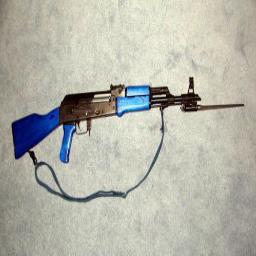

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


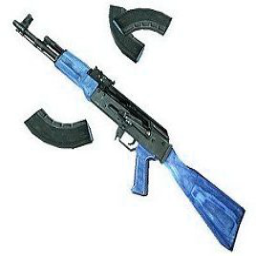

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


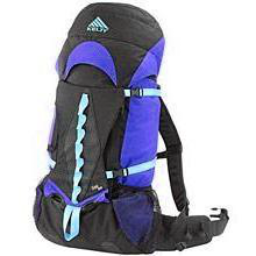

Distance between image 1 and image 2: 0.46064886
Distance between image 1 and image 3: 0.65422434


In [35]:
import tensorflow as tf

img_1 = read_image(image_files[0])
emb_1 = model.predict(np.expand_dims(img_1, axis=0), verbose=1)
imshow(img_1)

img_2 = read_image(image_files[1])
emb_2 = model.predict(np.expand_dims(img_2, axis=0), verbose=1)
imshow(img_2)

img_3 = read_image(image_files[342])
emb_3 = model.predict(np.expand_dims(img_3, axis=0), verbose=1)
imshow(img_3)

dist_1_2 = np.linalg.norm(emb_1 - emb_2)
dist_1_3 = np.linalg.norm(emb_1 - emb_3)

print("Distance between image 1 and image 2:", dist_1_2)
print("Distance between image 1 and image 3:", dist_1_3)

In [38]:
embeddings = []
count = 0
limit = len(image_files)

for file_path in image_files:
    img = read_image(file_path)
    emb = model.predict(np.expand_dims(img, axis=0), verbose=0)
    embeddings.append(emb)
    if count % 100 == 0:
        print(f"Processed {count}/{limit}")
    count += 1


Processed 0/1151
Processed 100/1151
Processed 200/1151
Processed 300/1151
Processed 400/1151
Processed 500/1151
Processed 600/1151
Processed 700/1151
Processed 800/1151
Processed 900/1151
Processed 1000/1151
Processed 1100/1151


In [41]:
csv_file = "embeddings.csv"
with open(csv_file, "w", newline="") as f:
    writer = csv.writer(f)
    
    for path, emb in zip(image_files, embeddings):
        writer.writerow([path] + emb.tolist())

print("Embeddings saved to", csv_file)

Embeddings saved to embeddings.csv
